In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset_intent_detection.csv', names=['label', 'text'])

In [3]:
df.head()

,label,text
0,Positive-reaction,- а то
1,Positive-reaction,- а я о чем и говорю
2,Positive-reaction,- бомба
3,Positive-reaction,- вай-вай
4,Positive-reaction,- вау


In [4]:
len(df.label.unique())

54

In [5]:
df['label'].value_counts()

Small_talk_food                        130
Another_joke                           110
Whoops                                 105
Smalltalk_answer                       101
Small_talk_boss                         91
Small_talk_fired                        83
Small_talk_you_are_right                81
Sick_of_listeting                       72
Small_talk_creators                     70
Messing_up                              58
Small_talk_relationships                56
Sorry                                   52
Small_talk_danger                       49
Small_talk_haha                         47
Bad_joke                                46
Hello                                   44
Small_talk_what-what                    43
Tell_joke                               42
Small_talk_ugly                         41
Compliment                              41
Finish                                  40
Small_talk_boring                       39
Small_talk_user_angry                   36
Small_talk_

In [8]:
len(df)

2090

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [39]:
def remove_chars_from_text(text):
    return "".join([ch for ch in text if ch not in spec_chars])

In [40]:
df['cleaned_text']= df.text.astype(str).apply(remove_chars_from_text)

In [41]:
df

,label,text,cleaned_text,review_len,word_count,cleaned_text2
0,Positive-reaction,- а то,а то,4,2,а то
1,Positive-reaction,- а я о чем и говорю,а я о чем и говорю,18,6,а я о чем и говорю
2,Positive-reaction,- бомба,бомба,5,1,бомба
3,Positive-reaction,- вай-вай,вай-вай,7,1,вайвай
4,Positive-reaction,- вау,вау,3,1,вау
...,...,...,...,...,...,...
2085,smalltalk_greetings_nice_to_see_you,- чудесно увидеть тебя,чудесно увидеть тебя,20,3,чудесно увидеть тебя
2086,smalltalk_greetings_nice_to_see_you,- это чудо видеть тебя здесь снова,это чудо видеть тебя здесь снова,32,6,это чудо видеть тебя здесь снова
2087,smalltalk_greetings_nice_to_see_you,- хорошо что ты снова тут,хорошо что ты снова тут,23,5,хорошо что ты снова тут
2088,smalltalk_greetings_nice_to_see_you,- приятно видеть тебя,приятно видеть тебя,19,3,приятно видеть тебя


In [15]:
df['review_len'] = df.cleaned_text.astype(str).apply(len)
df['word_count'] = df.cleaned_text.apply(lambda x: len(str(x).split()))

In [24]:
df.word_count.max()

13

In [16]:
text_class = dict()
for label in df.label.unique():
  df_class = df[df.label == label]
  text_class[label] = df_class.cleaned_text.str.cat(sep=', ')

In [18]:
from nltk.probability import FreqDist

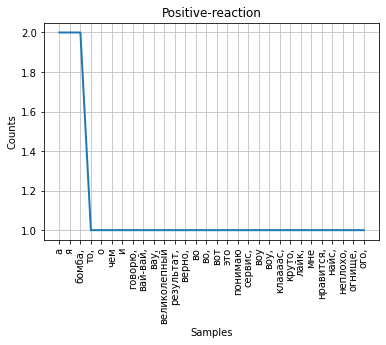

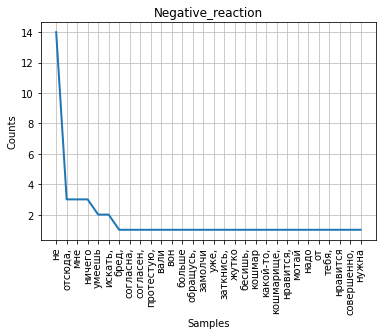

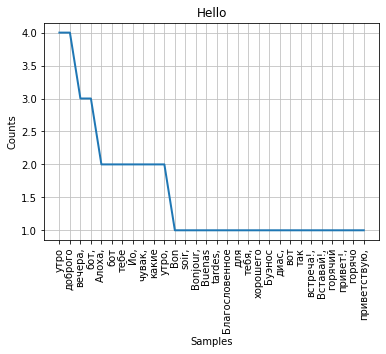

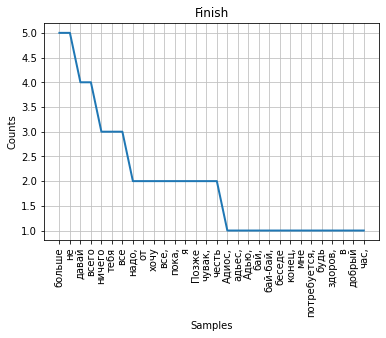

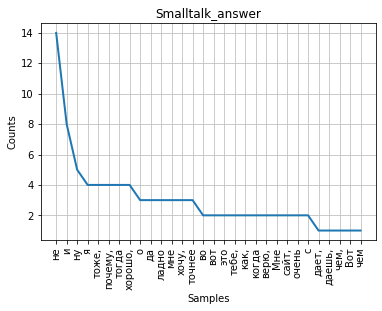

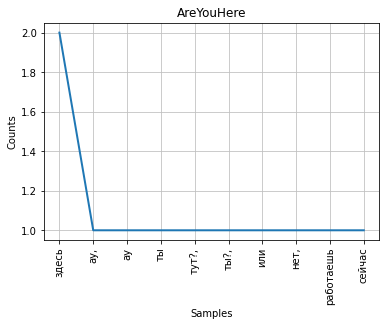

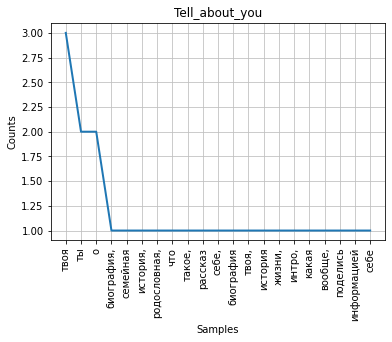

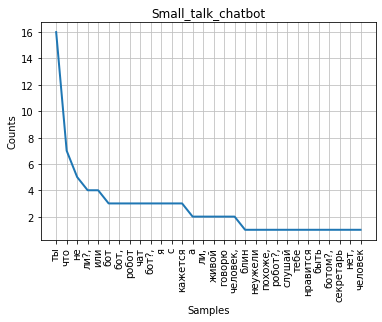

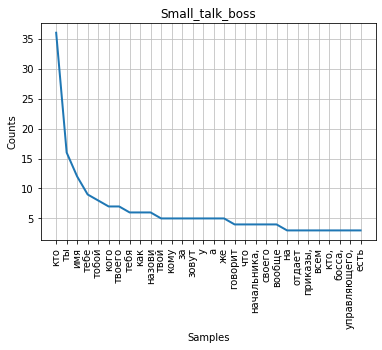

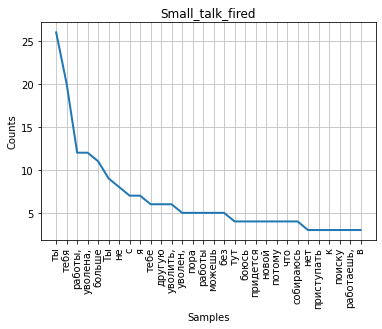

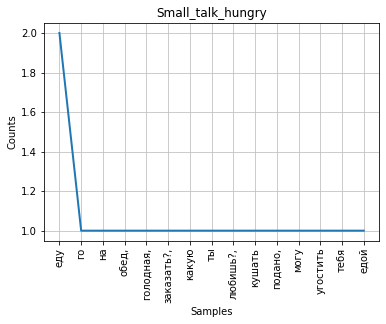

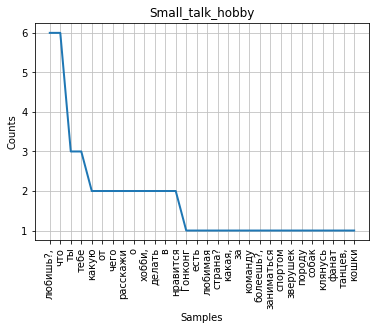

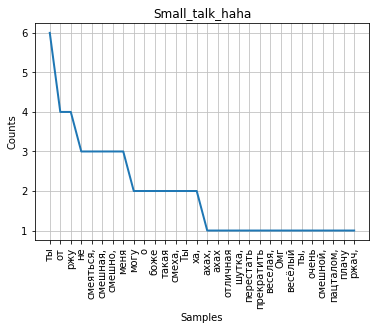

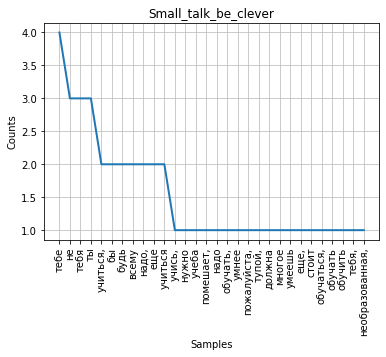

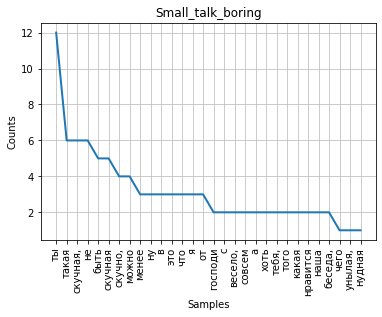

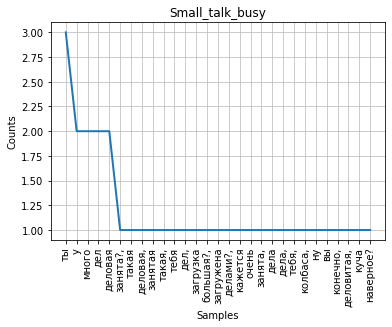

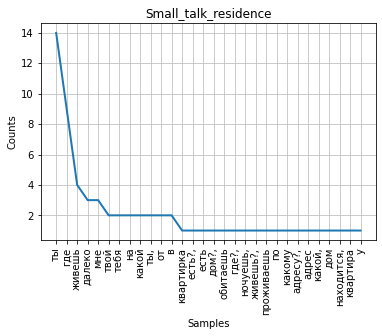

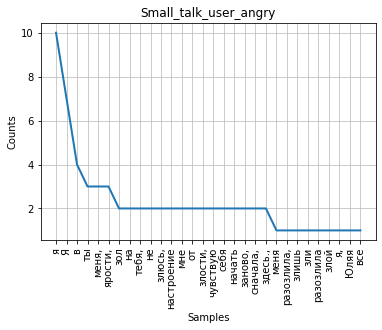

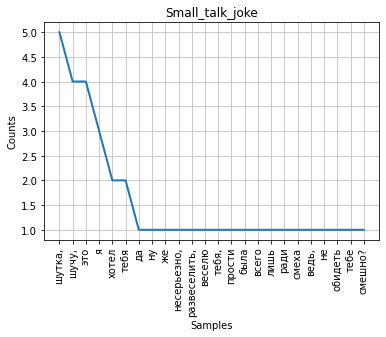

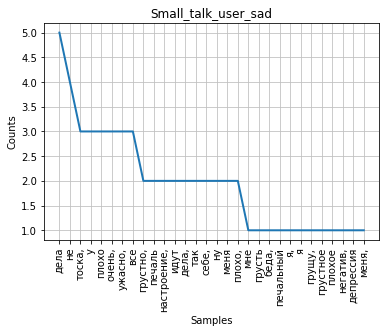

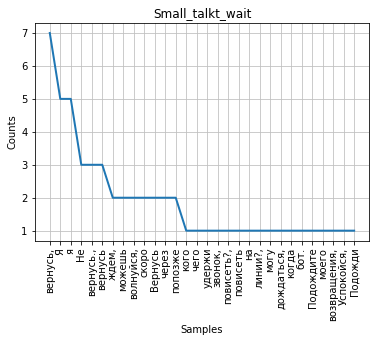

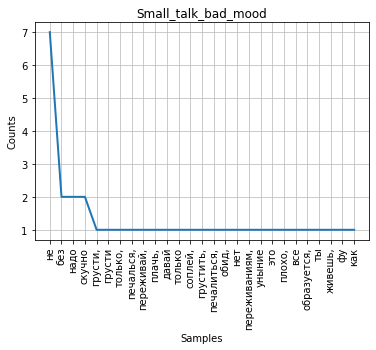

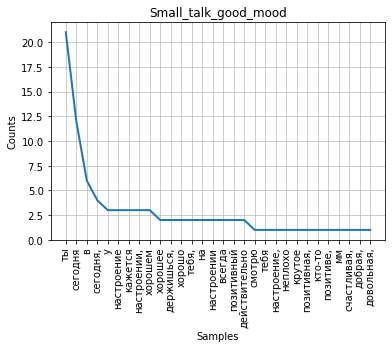

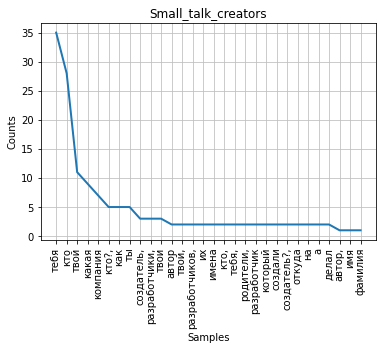

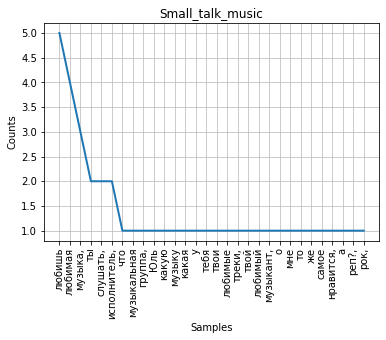

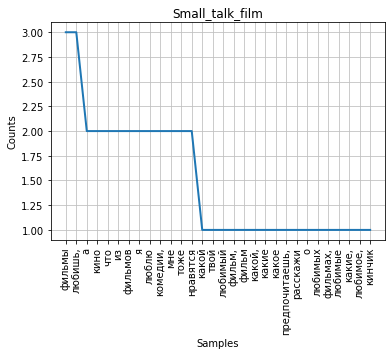

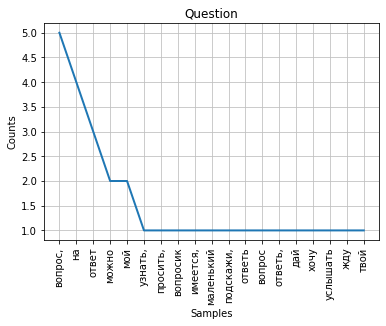

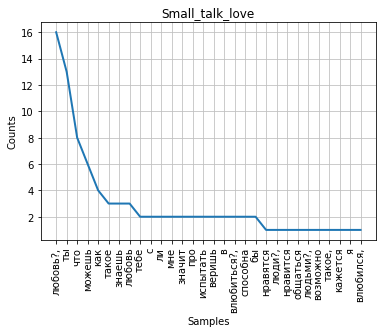

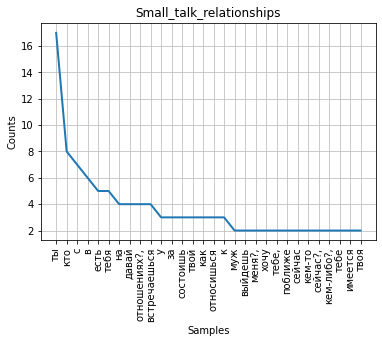

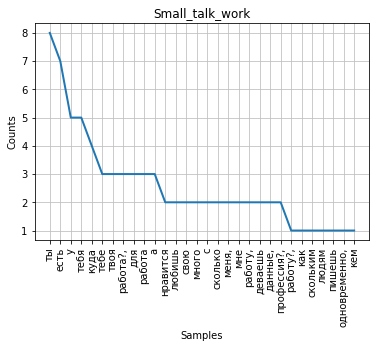

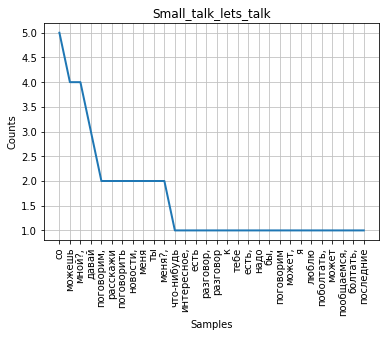

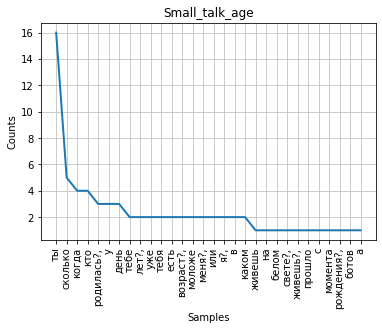

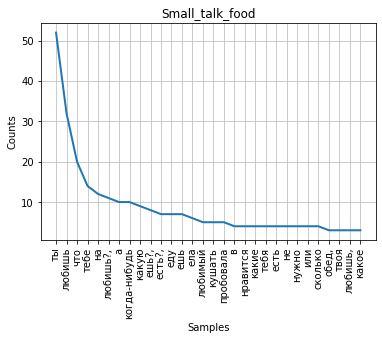

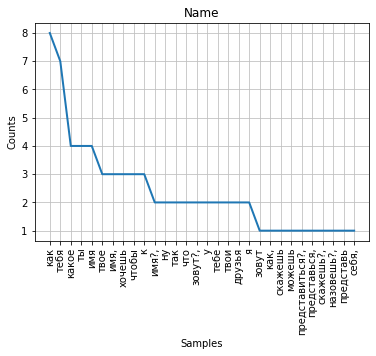

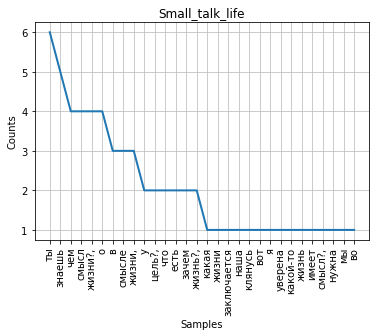

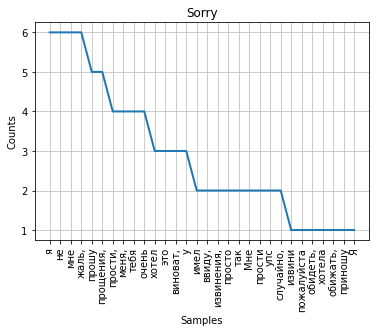

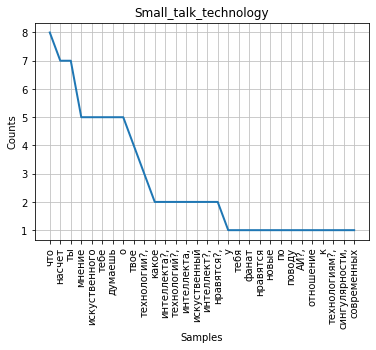

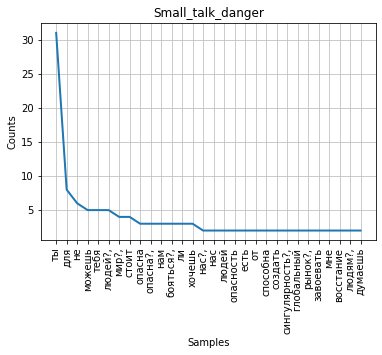

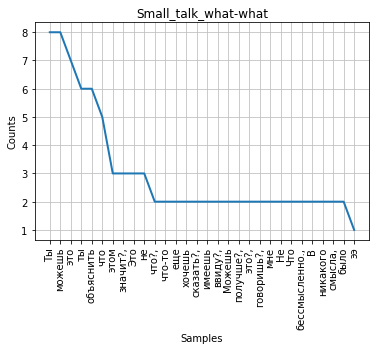

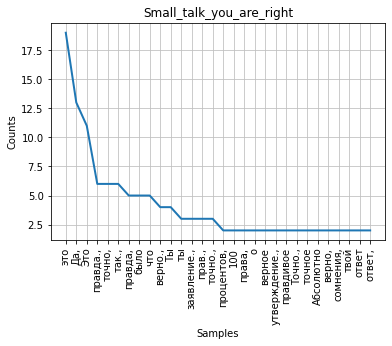

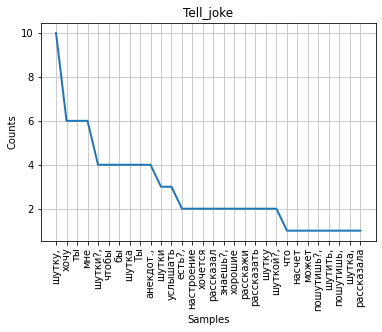

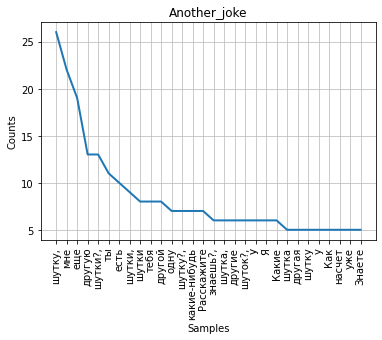

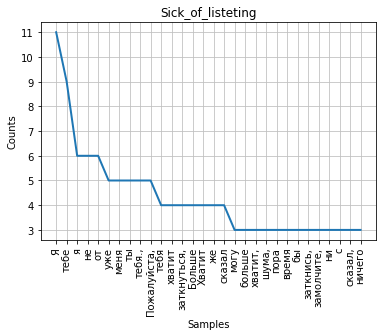

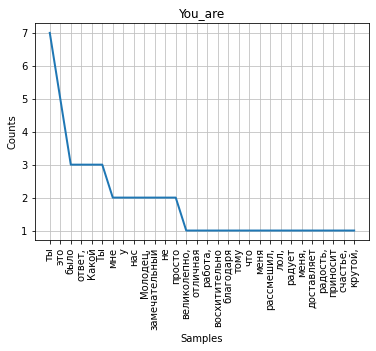

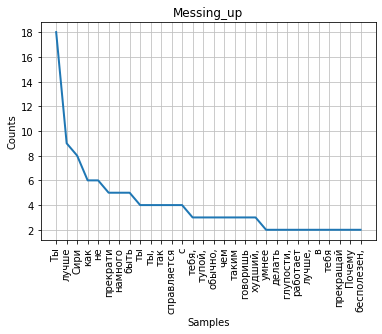

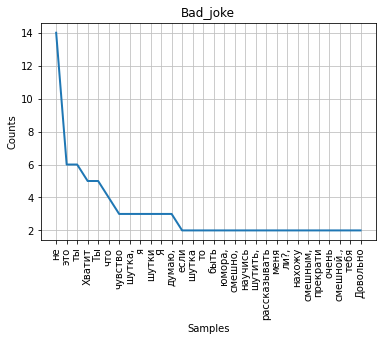

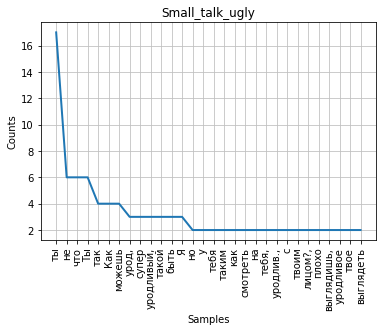

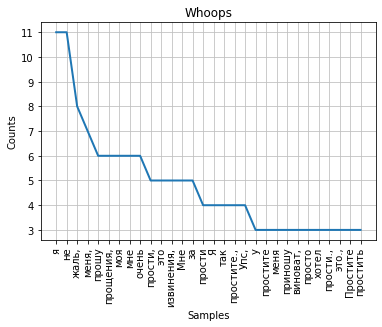

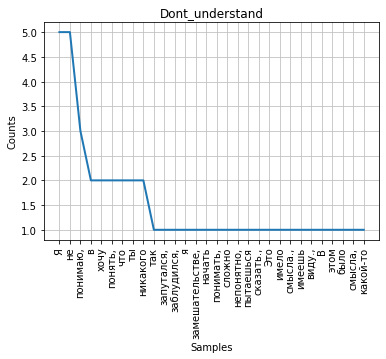

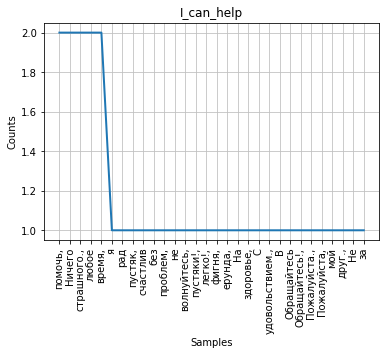

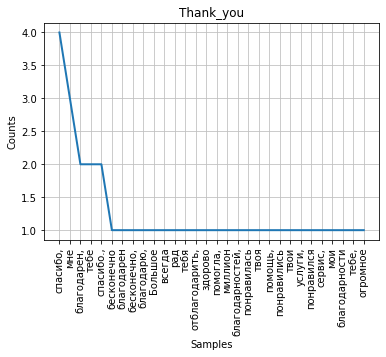

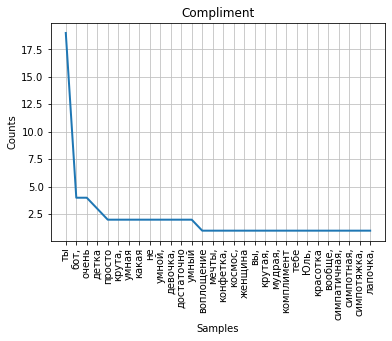

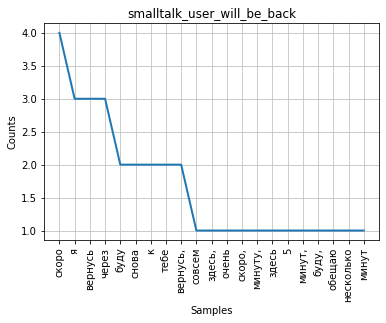

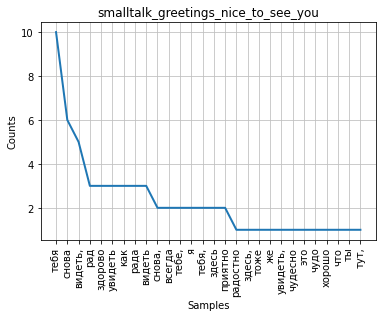

In [22]:
for label in text_class:
  fdist = FreqDist(text_class[label].split())
  fdist.plot(30,cumulative=False,title=label)

In [37]:
from nltk import word_tokenize
for label in text_class:
  text = remove_chars_from_text(text_class[label], spec_chars)
  text_tokens = word_tokenize(text)
  text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
  text = nltk.Text(text_tokens)
  fdist_sw = FreqDist(text)
  print(label, fdist_sw.most_common(10))

Positive-reaction [('бомба', 2), ('воу', 2), ('говорю', 1), ('вайвай', 1), ('вау', 1), ('великолепный', 1), ('результат', 1), ('верно', 1), ('понимаю', 1), ('сервис', 1)]
Negative_reaction [('отсюда', 4), ('нравится', 2), ('умеешь', 2), ('искать', 2), ('бред', 1), ('согласна', 1), ('согласен', 1), ('протестую', 1), ('вали', 1), ('вон', 1)]
Hello [('утро', 6), ('бот', 5), ('вечера', 4), ('доброго', 4), ('Алоха', 2), ('привет', 2), ('тебе', 2), ('желаю', 2), ('Йо', 2), ('чувак', 2)]
Finish [('давай', 4), ('Позже', 3), ('конец', 2), ('хочу', 2), ('общаться', 2), ('пока', 2), ('чувак', 2), ('честь', 2), ('имею', 2), ('Адиос', 1)]
Smalltalk_answer [('почему', 4), ('ладно', 3), ('говори', 3), ('хочу', 3), ('точнее', 3), ('тебе', 2), ('верю', 2), ('Мне', 2), ('нравится', 2), ('передай', 2)]
AreYouHere [('ау', 2), ('работаешь', 1)]
Tell_about_you [('твоя', 4), ('биография', 2), ('история', 2), ('семейная', 1), ('родословная', 1), ('такое', 1), ('рассказ', 1), ('жизни', 1), ('интро', 1), ('вооб

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.5 MB/s 
     |████████████████████████████████| 101 kB 10.4 MB/s 
     |████████████████████████████████| 6.6 MB 40.2 MB/s 
     |████████████████████████████████| 596 kB 48.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import pandas as pd
df = pd.read_csv('/content/dataset_intent_detection.csv', names=['intent', 'sentence'])

In [5]:
observations = df.groupby('intent').count().sort_values(['sentence'], ascending = False)
observations.head(5)

,sentence
intent,
Small_talk_food,130
Another_joke,110
Whoops,105
Smalltalk_answer,101
Small_talk_boss,91


In [6]:
observations.tail(5)

,sentence
intent,
Question,11
Tell_about_you,10
smalltalk_user_will_be_back,8
Small_talk_hungry,6
AreYouHere,5


In [8]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 9.7 MB/s 
     |████████████████████████████████| 287 kB 46.2 MB/s 


In [4]:
import re
import contractions 
def clean_text(text):
    # remove contractions first
    text = contractions.fix(text)
    # remove unwanted chars
    text = re.sub(r'[^\w]', ' ', text)
    # remove starting and trailing spaces
    text = text.lstrip()
    text = text.rstrip()
    # make everything lowercase
    text = text.lower()
    # delete multiple spaces
    text = re.sub(' +', ' ', text)
    # limit to 256 words
    wordlist = text.split()
    words_text = len([item for item in wordlist])
    if words_text < 256:
        wordlist = [item[:] for item in wordlist]
    else:
        wordlist = [item[:256] for item in wordlist]
    text = ' '.join([str(elem) for elem in wordlist]) 
    
    return text

In [5]:
df['sentence'] = df['sentence'].apply(lambda x: clean_text(x))

In [6]:
list_uniques = list(df.intent.unique())
label_dict = dict(enumerate(list_uniques))
label_map = {v: k for k, v in label_dict.items()}

In [7]:
df['id_label'] = df['intent'].map(label_map)
df.head(5)

,intent,sentence,id_label
0,Positive-reaction,а то,0
1,Positive-reaction,а я о чем и говорю,0
2,Positive-reaction,бомба,0
3,Positive-reaction,вай вай,0
4,Positive-reaction,вау,0


In [13]:
import pickle

#exporting the intent encoder
output = open('intent_encoder.pkl', 'wb')
pickle.dump(label_map, output)
output.close()

In [14]:
X = df.sentence
y = df.id_label

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import tensorflow as tf
from transformers import BertTokenizer, BertModel

In [17]:
model_name = 'bert-base-multilingual-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

In [18]:
encoded_data_train = tokenizer.batch_encode_plus(X_train, padding=True,
                                                 return_attention_mask=True,
                                                 max_length = 256, return_tensors='tf')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2340: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  "`max_length` is ignored when `padding`=`True` and there is no truncation strategy. "


In [19]:
encoded_data_test = tokenizer.batch_encode_plus(X_test, padding=True,
                                                 return_attention_mask=True,
                                                 max_length = 256, return_tensors='tf')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2340: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  "`max_length` is ignored when `padding`=`True` and there is no truncation strategy. "


In [20]:
labels_train = tf.convert_to_tensor(y_train)

In [21]:
labels_test = tf.convert_to_tensor(y_test)

In [22]:
batch_size = 8

In [23]:
dataset_train = tf.data.Dataset.from_tensor_slices((encoded_data_train.input_ids, labels_train))

In [24]:
dataset_test = tf.data.Dataset.from_tensor_slices((encoded_data_test.input_ids, labels_test))

In [25]:
from transformers import TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels = 95)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
from transformers import TFTrainer
from transformers import TFTrainingArguments

In [27]:
training_args = TFTrainingArguments(
    output_dir='./results',          
    num_train_epochs=3,              
    per_device_train_batch_size=8,  
    per_device_eval_batch_size=16,
    learning_rate=1e-6,
    logging_dir='./logs',            
)

In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [32]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.3 MB 4.7 MB/s 
     |████████████████████████████████| 981 kB 43.3 MB/s 
     |████████████████████████████████| 263 kB 58.5 MB/s 
     |████████████████████████████████| 2.8 MB 50.7 MB/s 
     |████████████████████████████████| 1.2 MB 48.4 MB/s 
     |████████████████████████████████| 468 kB 54.1 MB/s 
     |████████████████████████████████| 880 kB 55.9 MB/s 
     |████████████████████████████████| 3.3 MB 16.4 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.3-py3-none-any.whl size=25313110 sha256=fb87fd2ed2e5d9a61ef1bad6dc5f6ee9b862131f4d06694a94197df6a3f3f003
  Stored in directory: /root/.cache/pip/wheels/02/b2/23/62848f56f705788e6ad39f23f8c4b8127edbbe9daa14c9c91c
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=3cfcdeda4c44ae4c6bb14f8c

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text as txt

In [8]:
# Split dataset for bert
(X_train_bert, y_train_bert), (X_test_bert, y_test_bert), preproc = txt.texts_from_df(df, 'sentence',
                                                                                        label_columns = 'id_label',
                                                                                        lang = 'ru',
                                                                                        maxlen = 256,
                                                                                        val_pct = 0.2,
                                                                                        preprocess_mode='bert')

['id_label_0', 'id_label_1', 'id_label_2', 'id_label_3', 'id_label_4', 'id_label_5', 'id_label_6', 'id_label_7', 'id_label_8', 'id_label_9', 'id_label_10', 'id_label_11', 'id_label_12', 'id_label_13', 'id_label_14', 'id_label_15', 'id_label_16', 'id_label_17', 'id_label_18', 'id_label_19', 'id_label_20', 'id_label_21', 'id_label_22', 'id_label_23', 'id_label_24', 'id_label_25', 'id_label_26', 'id_label_27', 'id_label_28', 'id_label_29', 'id_label_30', 'id_label_31', 'id_label_32', 'id_label_33', 'id_label_34', 'id_label_35', 'id_label_36', 'id_label_37', 'id_label_38', 'id_label_39', 'id_label_40', 'id_label_41', 'id_label_42', 'id_label_43', 'id_label_44', 'id_label_45', 'id_label_46', 'id_label_47', 'id_label_48', 'id_label_49', 'id_label_50', 'id_label_51', 'id_label_52', 'id_label_53']
      id_label_0  id_label_1  id_label_2  id_label_3  id_label_4  id_label_5  \
770          0.0         0.0         0.0         0.0         0.0         0.0   
890          0.0         0.0         0.

Is Multi-Label? False
preprocessing test...
language: ru


In [10]:
# Load model
model = txt.text_classifier('bert', (X_train_bert, y_train_bert), preproc=preproc)

Is Multi-Label? False
maxlen is 256
done.


In [11]:
# Wrap model in ktrain learner object
learner = ktrain.get_learner(model, train_data=(X_train_bert, y_train_bert),
                             val_data=(X_test_bert, y_test_bert), batch_size=8)


In [ ]:
learner.fit_onecycle(3e-5, 2)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/2
 20/209 [=>............................] - ETA: 1:17:05 - loss: 3.9978 - accuracy: 0.0125